### Project Description

In this project we will be extracting live Stock Market data from yahoo finance. We will find similarities amongst various companies using their stock stock market prices and then cluster them into different clusters using the K-means algorithm.

In [1]:
import pandas_datareader
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
import yfinance as yfin

In [2]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [3]:
yfin.pdr_override()

start_date = datetime.datetime(2015, 4, 25)
end_date = datetime.datetime(2020, 4, 25)

stock_data = pandas_datareader.data.get_data_yahoo(list(companies_dict.values()), 
                                                   start=start_date,
                                                   end=end_date)

[*********************100%***********************]  24 of 24 completed


In [4]:
stock_data.head()

Adj Close                                                          \
                 AAPL       AMZN        AXP          BA        BAC        CVX   
Date                                                                            
2015-04-27  29.881830  21.927999  68.654213  130.068756  13.207670  76.925095   
2015-04-28  29.411026  21.465500  68.654213  129.813553  13.284061  77.920837   
2015-04-29  28.978512  21.468500  68.361839  128.616684  13.564173  78.348595   
2015-04-30  28.192329  21.089001  68.618782  126.143799  13.521733  77.878784   
2015-05-01  29.048347  21.143499  68.822517  127.314247  13.674522  76.462280   

                                                          ...   Volume  \
                    F          GE        HMC         IBM  ...       MA   
Date                                                      ...            
2015-04-27  10.522607  141.145004  30.482340  113.190285  ...  4854300   
2015-04-28  10.628495  142.405243  28.412024  115.305130  ...  4786300   
2015-04-29  10.701979  142.247681  28.176380  115.623383  ...  9364700   
2015-04-30  10.555009  142.195175  28.218468  113.561508  ...  7470700   
2015-05-01  10.561689  143.402893  28.799162  115.139397  ...  4663100   

                                                                           \
                MCD      MSFT      NOC      PEP      TM      TXN      VLO   
Date                                                                        
2015-04-27  7282700  59248200  1231500  5348500  273000  8397300  8056400   
2015-04-28  4357400  60730800  1132300  5065900  421900  6729300  7905400   
2015-04-29  5697200  47804600  1397300  4963600  282900  5276300  6002600   
2015-04-30  8300300  64725500  2465400  6714400  246800  6756900  8067500   
2015-05-01  6280300  38937300  1136500  4622300  247100  5726700  6905700   

                               
                WBA       XOM  
Date                           
2015-04-27  4110200  10534600  
2015-04-28  2366500   9633800  
2015-04-29  3224500  12534100  
2015-04-30  4750200  13947700  
2015-05-01  2282200  12257100  

[5 rows x 144 columns]

### Data Exploration

In [5]:
stock_open = stock_data["Open"]
stock_close = stock_data["Close"]

# movement is the difference between closing price and opening price of stock
# positive movement: suggesting to buy the stock
# negative movement: suggeseting to sell the stock
stock_movement = stock_close - stock_open
stock_movement.head()

,AAPL,AMZN,AXP,BA,BAC,CVX,F,GE,HMC,IBM,...,MA,MCD,MSFT,NOC,PEP,TM,TXN,VLO,WBA,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-27,0.084999,-0.265001,-0.340004,-0.789993,-0.070000,-0.639999,0.080000,-0.480392,-0.180000,-0.152954,...,-1.180000,-2.299995,0.799999,-1.919998,-0.680000,-0.300003,0.240002,-0.910000,-0.570000,-0.400002
2015-04-28,-0.975002,-0.460001,-0.200005,-0.389999,0.070000,1.070000,0.129999,1.020844,-0.800003,2.954117,...,0.580002,0.560005,1.380001,0.500000,-0.320000,-0.119995,-0.220001,-1.119999,0.240005,0.580002
2015-04-29,-0.380001,0.131001,0.030006,-0.920013,0.379999,0.910004,0.160001,0.840683,-0.310001,0.956024,...,-0.879997,0.439995,0.340000,-2.910004,0.159996,-0.540009,0.350002,-0.870003,-0.769997,0.370003
2015-04-30,-0.872499,-0.266499,0.409996,-1.910004,-0.070000,-0.980003,-0.170000,0.120102,-0.310001,-2.370941,...,-0.040001,-0.099998,-0.060001,-4.139999,0.959999,-0.979996,-0.700001,-1.149998,-1.070000,-1.299995
2015-05-01,0.712500,-0.047501,-0.169998,0.259995,0.110001,-1.239998,-0.089999,1.321091,0.120003,0.449326,...,0.889999,1.070000,0.079998,1.139999,0.399994,1.210007,0.600002,1.850002,0.930000,1.000000


In [6]:
# Stock's volatility plot
stock_high = stock_data["High"]
stock_low = stock_data["Low"]

# The more volatility, the more stock's value vary during period
stock_volatility = stock_high - stock_low
stock_volatility.head()

,AAPL,AMZN,AXP,BA,BAC,CVX,F,GE,HMC,IBM,...,MA,MCD,MSFT,NOC,PEP,TM,TXN,VLO,WBA,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-27,0.495003,0.4790,0.919998,1.289993,0.200000,1.199997,0.230000,1.140930,0.260002,1.137680,...,1.579994,2.680000,0.910000,2.899994,0.809998,0.699997,1.209999,1.239998,1.060005,0.839996
2015-04-28,1.242496,0.5480,0.790001,2.360001,0.210000,1.589996,0.309999,3.122559,1.370003,4.464630,...,1.130005,1.110001,1.509998,2.039993,0.750000,1.239990,0.880001,2.530003,0.740005,0.820000
2015-04-29,0.822498,0.4105,0.470001,1.560013,0.470001,1.309998,0.280001,2.101730,0.350002,2.227539,...,3.779999,1.599998,0.810001,5.029999,1.209999,2.399994,0.950001,1.610001,1.599998,1.110001
2015-04-30,1.014999,0.6255,0.699997,3.190002,0.249999,1.759995,0.300001,2.281860,0.389999,3.804977,...,1.729996,0.959999,0.940002,6.059998,1.570000,1.610001,1.230003,2.029999,1.860001,1.449997
2015-05-01,1.207500,0.4820,0.580002,1.230011,0.230000,2.460007,0.240000,1.981613,0.250000,1.510513,...,1.049995,1.239998,0.480000,1.770004,0.860001,1.240005,1.010002,2.180000,1.169998,1.250000


In [7]:
first_cols = set([col[0] for col in stock_data.columns])
first_cols

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

### Data Exploration: Amazon vs. Apple

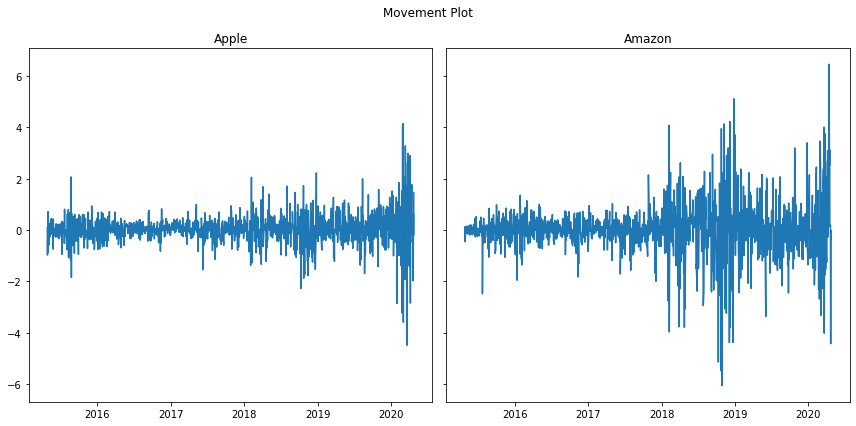

In [8]:
# Stock's movement plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
plt.suptitle("Movement Plot")

# Apple
axs[0].plot(stock_movement.index, stock_movement["AAPL"])
axs[0].set_title("Apple")

# Apple
axs[1].plot(stock_movement.index, stock_movement["AMZN"])
axs[1].set_title("Amazon")

plt.tight_layout()
plt.show()

Amazon's movement has been more fluctuatic than Apple's

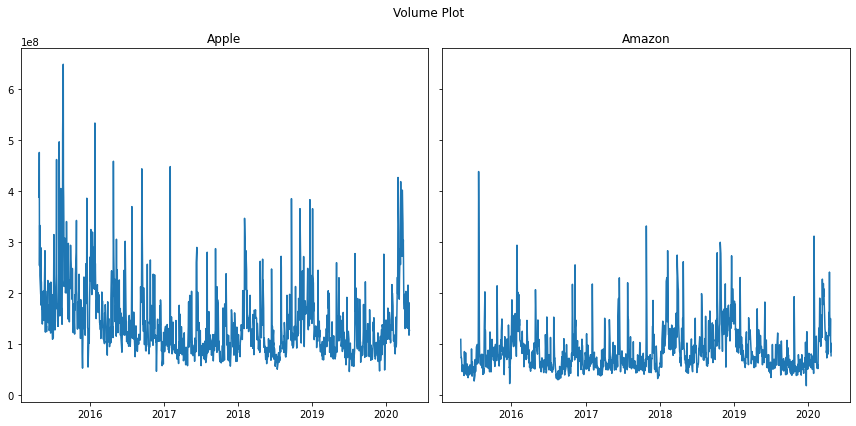

In [9]:
stock_volume = stock_data["Volume"]

# Stock's volume plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
plt.suptitle("Volume Plot")

# Apple
axs[0].plot(stock_volume.index, stock_volume["AAPL"])
axs[0].set_title("Apple")

# Apple
axs[1].plot(stock_volume.index, stock_volume["AMZN"])
axs[1].set_title("Amazon")

plt.tight_layout()
plt.show()

**Amazon's performance is better than Apple's by overall**. In 2018, Amazon's stock increased a lot until mid of the year. Then, most of Amazon's stock are low-priced, but the movement is great.

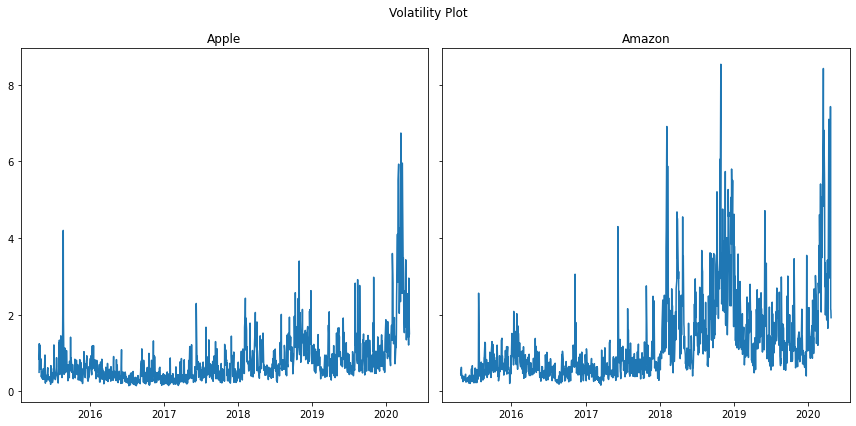

In [10]:
# Stock's volatility plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
plt.suptitle("Volatility Plot")

# Apple
axs[0].plot(stock_movement.index, stock_volatility["AAPL"])
axs[0].set_title("Apple")

# Apple
axs[1].plot(stock_movement.index, stock_volatility["AMZN"])
axs[1].set_title("Amazon")

plt.tight_layout()
plt.show()

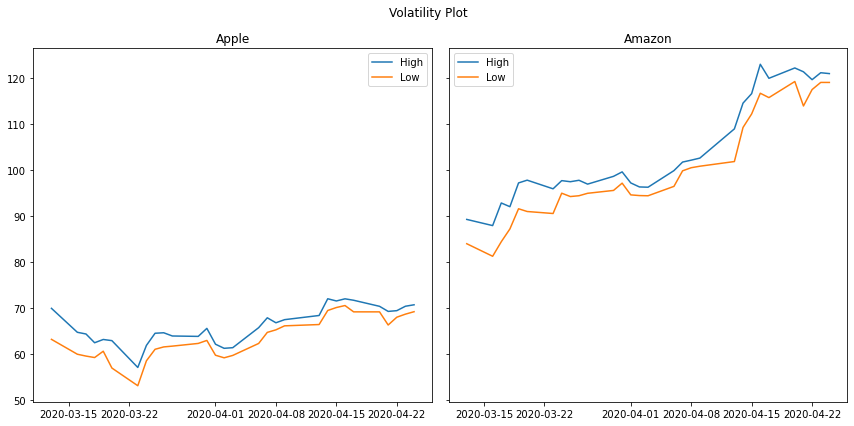

In [11]:
# Stock's movement plot: Open and Close
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
plt.suptitle("Volatility Plot")
# choose IDX
IDX = -30

# Apple
axs[0].plot(stock_movement.index[IDX:], stock_high["AAPL"][IDX:], label="High")
axs[0].plot(stock_movement.index[IDX:], stock_low["AAPL"][IDX:], label="Low")
axs[0].set_title("Apple")
axs[0].legend()

# Apple
axs[1].plot(stock_movement.index[IDX:], stock_high["AMZN"][IDX:], label="High")
axs[1].plot(stock_movement.index[IDX:], stock_low["AMZN"][IDX:], label="Low")
axs[1].set_title("Amazon")
axs[1].legend()

plt.tight_layout()
plt.show()

### Model Building: Clustering

In [12]:
import warnings
warnings.filterwarnings("ignore")
sns.set()

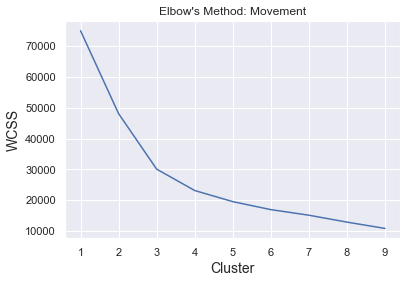

In [13]:
# Clustering based on movement
from sklearn.cluster import KMeans

stock_movement_T = stock_movement.T
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(stock_movement_T)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, len(wcss)+1), wcss)
plt.title("Elbow's Method: Movement")
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("WCSS", fontsize=14)
plt.show()

In [14]:
wcss_df = pd.DataFrame(data={
    "cluster": range(1, 10),
    "wcss": wcss
})
wcss_df.set_index("cluster")

,wcss
cluster,
1,74990.472491
2,48081.202630
3,30078.274906
4,23126.882565
5,19523.695436
6,16926.576590
7,15112.084705
8,12874.423171
9,10822.421143


Therefore, we will choose n_clusters for movement, either 3 or 4. In this case, we will choose 4.

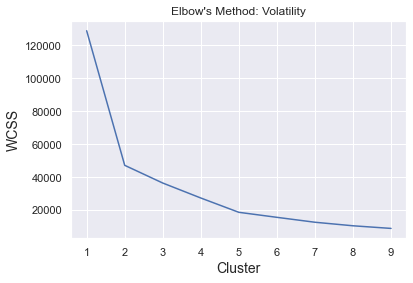

In [15]:
# Clustering based on volatility
from sklearn.cluster import KMeans

stock_volatility_T = stock_volatility.T
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(stock_volatility_T)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, len(wcss)+1), wcss)
plt.title("Elbow's Method: Volatility")
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("WCSS", fontsize=14)
plt.show()

Therefore, we will choose n_clusters for volatility is 5.

### Model Interpretation

In [16]:
kmeans_move = KMeans(n_clusters=4)
kmeans_vola = KMeans(n_clusters=5)

# Fitting model
kmeans_move.fit(stock_movement_T)
kmeans_vola.fit(stock_volatility_T)

# Assign the cluster
move_cluster = kmeans_move.predict(stock_movement_T)
vola_cluster = kmeans_vola.predict(stock_volatility_T)

In [19]:
cluster_df = pd.DataFrame(data={
    "company": stock_movement_T.index,
    "cluster_movement": move_cluster,
    "cluster_volatility": vola_cluster
})

cluster_df

,company,cluster_movement,cluster_volatility
0,AAPL,1,0
1,AMZN,1,0
2,AXP,1,4
3,BA,2,3
4,BAC,1,0
5,CVX,1,4
6,F,1,0
7,GE,1,4
8,HMC,1,0
9,IBM,1,4


In [43]:
cluster_num = 0
which_cluster = "cluster_movement" # or "cluster_volatility"

# Show dataframe whose "which_cluster" is "cluster_num"
cluster_n = cluster_df[cluster_df[which_cluster] == cluster_num]
cluster_n

,company,cluster_movement,cluster_volatility
14,MA,0,2


### Conclusion

Based on the characteristic of each company's stocks, we can see there are unique movement and volatility itself. Interestingly, we can see:
1. Companies whose **cluster_movement = "1"** can also be grouped into **cluster_volatity either equals to "0" or "4"**.
2. Companies whose **cluster_movement = "3"** only can be grouped into **cluster_volatility = "1"**